In [1]:
%load_ext RWinOut

In [2]:
%%R

library(bnlearn)

In [3]:
%%R

# Assumptions

# A = Age
# N = Nationality
# Po = Position (Preferred/Most frequent)
# O_C = Origin Club
# O_L = Origin League
# O_L_C = Origin League Country
# A_C = Arrival Club
# A_L = Arrival League
# A_L_C = Arrival League Country
# Ov_S = Overall_Stats
# Prv_S = Previous_Season_Stats
# Y = Year
# T = Transfer Price

dag <- model2network("[A][N][Po][Ov_S|Po][Prv_S|Po][O_C|O_L][A_C|A_L][O_L|O_L_C][O_L_C][A_L|A_L_C][A_L_C][Y][T|A:N:Po:Ov_S:Prv_S:O_C:A_C:Y]")
dag


  Random/Generated Bayesian network

  model:
   [A][A_L_C][N][O_L_C][Po][Y][A_L|A_L_C][O_L|O_L_C][Ov_S|Po][Prv_S|Po][A_C|A_L]
   [O_C|O_L][T|A:A_C:N:O_C:Ov_S:Po:Prv_S:Y]
  nodes:                                 13 
  arcs:                                  14 
    undirected arcs:                     0 
    directed arcs:                       14 
  average markov blanket size:           6.15 
  average neighbourhood size:            2.15 
  average branching factor:              1.08 

  generation algorithm:                  Empty 



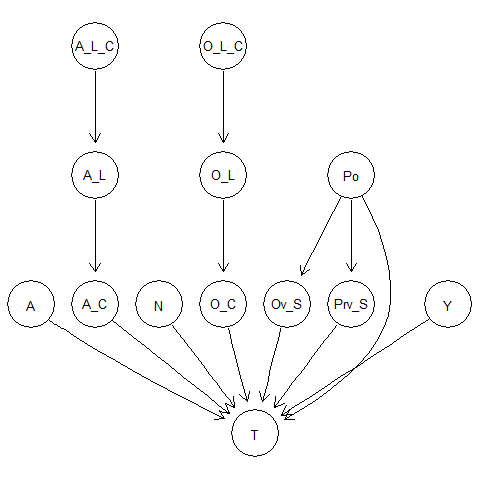

In [4]:
%%R

graphviz.plot(dag)

In [5]:
#imports

from statistics import mean
import torch
import numpy as np
import pyro
import pyro.distributions as dist
from pyro.infer import Importance, EmpiricalMarginal
import matplotlib.pyplot as plt
%matplotlib inline

pyro.set_rng_seed(101)

In [ ]:
#Transfer the bnlearn model to Pyro

# A = Age                          A_alias = ['Under23','Under30','Above30']
# N = Nationality                  N_alias = ['A','B','C','D'] (Either by world rankings or Star Ratings from FIFA)
# Po = Position                    Po_alias = ['GK','CentreBack','FullBack','CentreMid','Winger','ST']
# O_C = Origin Club                OC__alias = []
# O_L = Origin League              OL_alias = ['1','2','3','4'] (League levels in respective countries)
# O_L_C = Origin League Country    OLC_alias = ['A','B','C','D'] (Either by world rankings or Star Ratings from FIFA)
# A_C = Arrival Club               AC__alias = []
# A_L = Arrival League             AL_alias = ['1','2','3','4'] (League levels in respective countries)
# A_L_C = Arrival League Country   ALC_alias = ['A','B','C','D'] (Either by world rankings or Star Ratings from FIFA)
# Ov_S = Overall_Stats             OvS__alias = []
# Prv_S = Previous_Season_Stats    PrvS_alias = []
# Y = Year                         Y_alias = []
# T = Transfer Price               T_alias = []

A_alias = ['U23','U30','A30']
N_alias = ['A','B','C','D']
Po_alias = ['GK','CB','FB','CM','W','ST']
OC__alias = []
OL_alias = ['1','2','3','4']
OLC_alias = ['A','B','C','D']
AC__alias = []
AL_alias = ['1','2','3','4']
ALC_alias = ['A','B','C','D']
OvS__alias = []
PrvS_alias = []
Y_alias = []
T_alias = []

A_prob = []
N_prob = []
Po_prob = []
OC__prob = []
OL_prob = []
OLC_prob = []
AC__prob = []
AL_prob = []
ALC_prob = []
OvS__prob = []
PrvS_prob = []
Y_prob = []
T_prob = []



def model():
    
    A = pyro.sample("A", dist.Categorical(probs=A_prob))
    N = pyro.sample("N", dist.Categorical(probs=N_prob))
    OLC = pyro.sample("OLC", dist.Categorical(probs=OLC_prob))
    OL = pyro.sample("OL", dist.Categorical(probs=OL_prob[OLC]))
    OC = pyro.sample("OC", dist.Categorical(probs=OC_prob[OL]))
    ALC = pyro.sample("ALC", dist.Categorical(probs=ALC_prob))
    AL = pyro.sample("AL", dist.Categorical(probs=AL_prob[ALC]))
    AC = pyro.sample("AC", dist.Categorical(probs=AC_prob[AL]))
    Po = pyro.sample("Po", dist.Categorical(probs=Po_prob))
    OvS = pyro.sample("OvS", dist.Categorical(probs=OvS_prob[Po]))
    PrvS = pyro.sample("PrvS", dist.Categorical(probs=PrvS_prob[Po]))
    Y = pyro.sample("Y", dist.Categorical(probs=Y_prob))
    T = pyro.sample("T", dist.Categorical(probs=T_prob[Y][OvS][PrvS][Po][AC][OC][A][N]))
    
    return{'A': A,'N': N,'OLC': OLC,'OL': OL,'OC': OC, 'ALC': ALC, 'AL': AL, 'AC': AC, 
           'Po': Po, 'OvS': OvS, 'PrvS': PrvS, 'Y': Y, 'T': T}

print(model())
